# Análisis de Caso de Estudio Prueba Colsubsidio

### 1. Modelo de Fuga

### 1.1 Descripción del Reto Analítico

### **Desarrollo de Reto Analítico**

### Paso 1: Importación de Librerías

In [1]:
##Cargue de Librerías Importantes
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid")
import warnings
warnings.filterwarnings('ignore')

### Paso 2: Cargue de la data Seleccionada

In [2]:
##Cargue de data de entrenamiento y testing
train = pd.read_csv('train.csv', encoding='latin1', sep=';')

test = pd.read_csv('test.csv', encoding='latin1', sep=';')

print('Tamaño datos de entrenamiento: %s y Tamaño de datos de testing: %s' % (train.shape,test.shape))

Tamaño datos de entrenamiento: (50001, 22) y Tamaño de datos de testing: (5001, 20)


In [3]:
## Cargue de data complementaria, aspectos sociodemográficos y de subsidios
demograf = pd.read_excel('train_test_demograficas.xlsx')

subsidios = pd.read_excel('train_test_subsidios.xlsx')

print('Tamaño datos demográficos: %s y Tamaño de datos de subsidios: %s' % (demograf.shape, subsidios.shape))

Tamaño datos demográficos: (55002, 10) y Tamaño de datos de subsidios: (55002, 4)


In [4]:
### Se generan copias de todos los dataframes para proceder a creación del full join teniendo en cuenta la data
###complementaria unida por el id
train2 = train.copy()
test2 = test.copy()
demograf2 = demograf.copy()
subsidios2 = subsidios.copy()

train2 = train2.merge(demograf2[['id','categoria','segmento','edad', 'nivel_educativo','estado_civil','Genero','PAC','contrato','estrato']], 
                                      how = 'left', 
                                      left_on = ['id'], 
                                      right_on = ['id'])

train2 = train2.merge(subsidios2[['id','cuota_monetaria','sub_vivenda','bono_lonchera']], 
                                      how = 'left', 
                                      left_on = ['id'], 
                                      right_on = ['id'])

test2 = test2.merge(demograf2[['id','categoria','segmento','edad', 'nivel_educativo','estado_civil','Genero','PAC','contrato','estrato']], 
                                      how = 'left', 
                                      left_on = ['id'], 
                                      right_on = ['id'])

test2 = test2.merge(subsidios2[['id','cuota_monetaria','sub_vivenda','bono_lonchera']], 
                                      how = 'left', 
                                      left_on = ['id'], 
                                      right_on = ['id'])

In [5]:
data_full = train2.merge(test2[['id', 'Fecha.Expedicion', 'Cancelacion', 'Gestionable',
       'TIPO', 'ANO_MES', 'Fecha.Proceso', 'Disponible.Avances',
       'Limite.Avances', 'Total.Intereses', 'Saldos.Mes.Ant', 'Pagos.Mes.Ant',
       'Vtas.Mes.Ant', 'Edad.Mora', 'Limite.Cupo', 'Pago.del.Mes',
       'Pago.Minimo', 'Vr.Mora', 'Vr.Cuota.Manejo', 'Saldo', 'categoria',
       'segmento', 'edad', 'nivel_educativo', 'estado_civil', 'Genero', 'PAC',
       'contrato', 'estrato', 'cuota_monetaria', 'sub_vivenda',
       'bono_lonchera']] , how='outer')


data_full.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 55002 entries, 0 to 55001
Data columns (total 34 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   id                  55002 non-null  int64  
 1   Fecha.Expedicion    55002 non-null  object 
 2   Cancelacion         1549 non-null   object 
 3   Gestionable         1549 non-null   object 
 4   Retencion           1412 non-null   object 
 5   TIPO                1549 non-null   object 
 6   ANO_MES             1549 non-null   float64
 7   Target              50001 non-null  float64
 8   Fecha.Proceso       55002 non-null  object 
 9   Disponible.Avances  55002 non-null  object 
 10  Limite.Avances      55002 non-null  object 
 11  Total.Intereses     55002 non-null  object 
 12  Saldos.Mes.Ant      55002 non-null  object 
 13  Pagos.Mes.Ant       55002 non-null  object 
 14  Vtas.Mes.Ant        55002 non-null  object 
 15  Edad.Mora           55002 non-null  int64  
 16  Limi

### Paso 3: Limpieza de Datos y Preprocesamiento

In [6]:
# Propiedades Estadísticas
##Uniendo los dataframes de cada Excel y Csv seleccionado se tiene un universo completo de 55.000 datos aproximadamente
##Se procede a revisar los datos NAN inconsistentes y tomar medidas para completar la información requerida
##Se determinó la unión de la información para poder hacer particiones de entrenamiento y testeo variados y asi
## determinar la eficiencia de los modelos y escoger el mejor.
data_full.describe().T

,count,mean,std,min,25%,50%,75%,max
id,55002.0,27501.500000,15877.854090,1.0,13751.25,27501.5,41251.75,55002.0
ANO_MES,1549.0,201716.475791,29.327677,201701.0,201704.00,201707.0,201711.00,201803.0
Target,50001.0,0.028239,0.165658,0.0,0.00,0.0,0.00,1.0
Edad.Mora,55002.0,89.802007,408.602785,0.0,0.00,0.0,0.00,4050.0
edad,55002.0,41.487837,13.867776,18.0,30.00,41.0,54.00,65.0
PAC,55002.0,2.158612,0.933550,0.0,1.00,3.0,3.00,3.0
contrato,55002.0,2.491800,1.114936,1.0,2.00,2.0,3.00,4.0
estrato,4418.0,2.125396,1.202078,1.0,1.00,2.0,3.00,5.0
cuota_monetaria,55002.0,0.750518,0.432717,0.0,1.00,1.0,1.00,1.0
sub_vivenda,55002.0,0.001473,0.038348,0.0,0.00,0.0,0.00,1.0


In [7]:
##Función para análisis de datos inconsistentes por COlumnas
#Análisis exploratorio inicial
def inicio_EDA(df):
    if isinstance(df, pd.DataFrame):
        total_na = df.isna().sum().sum()
        print("Dimensiones : %d filas, %d columnas" % (df.shape[0], df.shape[1]))
        print("Total Valores NA : %d " % (total_na))
        print("%38s %10s     %10s %10s" % ("Nombre Columna", "Tipo de Dato", "#Distintos", "Valores NA"))
        col_name = df.columns
        dtyp = df.dtypes
        uniq = df.nunique()
        na_val = df.isna().sum()
        for i in range(len(df.columns)):
            print("%38s %10s   %10s %10s" % (col_name[i], dtyp[i], uniq[i], na_val[i]))
        
    else:
        print("Se esperaba dataframe %15s" % (type(df)))

inicio_EDA(data_full)

Dimensiones : 55002 filas, 34 columnas
Total Valores NA : 322987 
                        Nombre Columna Tipo de Dato     #Distintos Valores NA
                                    id      int64        55002          0
                      Fecha.Expedicion     object         4024          0
                           Cancelacion     object           39      53453
                           Gestionable     object            5      53453
                             Retencion     object            5      53590
                                  TIPO     object            2      53453
                               ANO_MES    float64           14      53453
                                Target    float64            2       5001
                         Fecha.Proceso     object           16          0
                    Disponible.Avances     object        12211          0
                        Limite.Avances     object         1641          0
                       Total.Intereses    

In [8]:
##Se procede a la limpieza de la data y la reducción de etiquetas de la columna cancelación para así
## realizar una imputación de valores y completar la data inconsistente.
data_full['Cancelacion'].value_counts()

CUOTA DE MANEJO                                                            287
AMPARADA-NO DESEA RECIBIR EL CUPO                                          168
CAPACIDAD DE ENDEUDAMIENTO PARA PAGO A OTRO CREDITO ( HIPOTECARIO)         167
INCONFORMIDAD DEL PRODUCTO                                                 156
CAPACIDAD DE ENDEUDAMIENTO PARA PAGO A OTRO CREDITO ( Hipotecario)         146
NO LO UTILIZA                                                              122
RETIRO DE LA CAJA/ EMPRESA                                                  81
SE VA DEL PAIS/CIUDAD DONDE NO TENEMOS PRESENCIA COLSUBSIDIO                52
NO NECESITA EL PRODUCTO                                                     49
NO DESEA TENER MAS CRÉDITOS                                                 47
NO DESEA TENER MAS CREDITOS                                                 28
CAPACIDAD DE  PAGO                                                          25
SE VA DEL PAIS                                      

In [9]:
data_full['Cancelacion'].unique()

array([nan, 'AMPARADA-NO DESEA RECIBIR EL CUPO',
       'INCONFORMIDAD DEL PRODUCTO', 'CUOTA DE MANEJO', 'CuoTA DE MANEJO',
       'NO LO UTILIZA', 'NO DESEA TENER MAS CRÉDITOS',
       'NO NECESITA EL PRODUCTO',
       'CAPACIDAD DE ENDEUDAMIENTO PARA PAGO A OTRO CREDITO ( HIPOTECARIO)',
       'CAPACIDAD DE ENDEUDAMIENTO PARA PAGO A OTRO CREDITO ( Hipotecario)',
       'RETIRO DE LA CAJA/ EMPRESA',
       'SE VA DEL PAIS/CIUDAD DONDE NO TENEMOS PRESENCIA COLSUBSIDIO',
       'NO DESEA TENER MAS CREDITOS', 'CAPACIDAD DE  PAGO',
       'INCONFORMIDAD CON EL DESCUENTO DEL SUBSIDIO FAMILIAR',
       'CAPACIDAD DE ENDEUDAMIENTO PARA PAGO A OTRO CRÉDITO ( LIBRE INVERSION )',
       'CAPACIDAD DE ENDEUDAMIENTO PARA PAGO A OTRO CRÉDITO ( HIPOTECARIO )',
       'SE VA DEL PAIS', 'SEGURO METLIFE', 'REPORTE EN DATA CREDITO',
       'INTERES MUY  ALTOS',
       'INCONFORMIDAD CON EL COBRO DE SEGURO DE VIDA Y DESEMPLEO',
       'INTERES MUY ALTOS', 'CAPACIDAD DE PAGO',
       'INCONFORME CON EL M

In [10]:
##Función para reduccion de features en la columna Cancelación
def cancelacion(series):
    if series['Cancelacion']=='CuoTA DE MANEJO':
        return 'CUOTA DE MANEJO'
    elif series['Cancelacion']=='CAPACIDAD DE ENDEUDAMIENTO PARA PAGO A OTRO CREDITO ( Hipotecario)':
        return 'CAPACIDAD DE ENDEUDAMIENTO PARA PAGO A OTRO CREDITO ( Hipotecario)'
    elif series['Cancelacion']=='CAPACIDAD DE ENDEUDAMIENTO PARA PAGO A OTRO CRÉDITO ( HIPOTECARIO )':
        return 'CAPACIDAD DE ENDEUDAMIENTO PARA PAGO A OTRO CREDITO ( Hipotecario)'
    elif series['Cancelacion']=='SE VA DEL PAIS':
        return 'SE VA DEL PAIS/CIUDAD DONDE NO TENEMOS PRESENCIA COLSUBSIDIO'
    elif series['Cancelacion']=='INTERES MUY  ALTOS':
        return 'INTERES MUY ALTOS'
    elif series['Cancelacion']=='INCONFORMIDAD CON EL COBRO DE SEGURO DE VIDA Y DESEMPLEO':
        return 'INCONFORMIDAD CON EL COBRO DE SEGUROS'
    elif series['Cancelacion']=='CAPACIDAD DE ENDEUDAMIENTO PARA PAGO A OTRO CREDITO ( Libre Inversion)':
        return 'CAPACIDAD DE ENDEUDAMIENTO PARA PAGO A OTRO CRÉDITO ( LIBRE INVERSION )'
    elif series['Cancelacion']=='AMPARADA-NO DESEA RECIBIR EL CUPO':
        return 'AMPARADA-NO DESEA RECIBIR EL CUPO'
    elif series['Cancelacion']=='INCONFORMIDAD DEL PRODUCTO':
        return 'INCONFORMIDAD DEL PRODUCTO'
    elif series['Cancelacion']=='CUOTA DE MANEJO':
        return 'CUOTA DE MANEJO'
    elif series['Cancelacion']=='NO LO UTILIZA':
        return 'INCONFORMIDAD DEL PRODUCTO'
    elif series['Cancelacion']=='NO DESEA TENER MAS CRÉDITOS':
        return 'NO DESEA TENER MAS CRÉDITOS'
    elif series['Cancelacion']=='NO NECESITA EL PRODUCTO':
        return 'INCONFORMIDAD DEL PRODUCTO'
    elif series['Cancelacion']=='RETIRO DE LA CAJA/ EMPRESA':
        return 'RETIRO DE LA CAJA/ EMPRESA'
    elif series['Cancelacion']=='SE VA DEL PAIS/CIUDAD DONDE NO TENEMOS PRESENCIA COLSUBSIDIO':
        return 'SE VA DEL PAIS/CIUDAD DONDE NO TENEMOS PRESENCIA COLSUBSIDIO'
    elif series['Cancelacion']=='CAPACIDAD DE  PAGO':
        return 'CAPACIDAD DE ENDEUDAMIENTO PARA PAGO A OTRO CRÉDITO ( LIBRE INVERSION )'
    elif series['Cancelacion']=='INCONFORMIDAD CON EL DESCUENTO DEL SUBSIDIO FAMILIAR':
        return 'INCONFORMIDAD CON EL DESCUENTO DEL SUBSIDIO FAMILIAR'
    elif series['Cancelacion']=='CAPACIDAD DE ENDEUDAMIENTO PARA PAGO A OTRO CRÉDITO ( LIBRE INVERSION )':
        return 'CAPACIDAD DE ENDEUDAMIENTO PARA PAGO A OTRO CRÉDITO ( LIBRE INVERSION )'
    elif series['Cancelacion']=='SE VA DEL PAIS':
        return 'SE VA DEL PAIS/CIUDAD DONDE NO TENEMOS PRESENCIA COLSUBSIDIO'
    elif series['Cancelacion']=='SEGURO METLIFE':
        return 'SEGURO METLIFE'
    elif series['Cancelacion']=='REPORTE EN DATA CREDITO':
        return 'REPORTE EN DATA CREDITO'
    elif series['Cancelacion']=='INTERES MUY  ALTOS':
        return 'INTERES MUY ALTOS'
    elif series['Cancelacion']=='INCONFORMIDAD CON EL COBRO DE SEGURO DE VIDA Y DESEMPLEO':
        return 'INCONFORMIDAD CON EL COBRO DE SEGURO DE VIDA Y DESEMPLEO'
    elif series['Cancelacion']=='INTERES MUY ALTOS':
        return 'INTERES MUY ALTOS'
    elif series['Cancelacion']=='CAPACIDAD DE PAGO':
        return 'CAPACIDAD DE PAGO'
    elif series['Cancelacion']=='INCONFORME CON EL MODO DE COBRANZA  ':
        return 'INCONFORMIDAD DEL PRODUCTO'
    elif series['Cancelacion']=='NO LE HAN  ENTREGADO  DE LA TARJETA ':
        return 'NO LE HAN  ENTREGADO  DE LA TARJETA '
    elif series['Cancelacion']=='INCONFORMIDAD CON EL COBRO DE SEGUROS ':
        return 'INCONFORMIDAD DEL PRODUCTO'
    elif series['Cancelacion']=='SÓLO POR EL CINCUENTAZO':
        return 'SÓLO POR EL CINCUENTAZO'
    elif series['Cancelacion']=='INFORMACION ERRADA: NO LE DIERON LA INFORMACION COMPLETA AL CLIENTE':
        return 'NO LE DIERON LA INFORMACION COMPLETA AL CLIENTE'
    elif series['Cancelacion']=='AMPARADA- PASA A SER TITULAR':
        return 'AMPARADA- PASA A SER TITULAR'
    elif series['Cancelacion']=='NO CUMPLEN CON LAS EXPECTATIVAS':
        return 'INCONFORMIDAD DEL PRODUCTO'
    elif series['Cancelacion']=='NO ME APLICAN LOS PAGOS':
        return 'NO ME APLICAN LOS PAGOS'
    elif series['Cancelacion']=='CAPACIDAD DE ENDEUDAMIENTO PARA PAGO A OTRO CRÉDITO (LIBRE INVERSIÓN)':
        return 'CAPACIDAD DE ENDEUDAMIENTO PARA PAGO A OTRO CRÉDITO ( LIBRE INVERSION )'
    elif series['Cancelacion']=='MAS CARO LOS PRODUCTOS EN COLSUBSIDIO':
        return 'INCONFORMIDAD DEL PRODUCTO'
    elif series['Cancelacion']=='NO CUENTA CON LA TARJETA/NO DESEA GENERAR EL PROCESO DE CAMBIO DE CLAVE':
        return 'NO CUENTA CON LA TARJETA/NO DESEA GENERAR EL PROCESO DE CAMBIO DE CLAVE'
    elif series['Cancelacion']=='REDUCEN EL CUPO DE LA PRINCIPAL':
        return 'REDUCEN EL CUPO DE LA PRINCIPAL'
    elif series['Cancelacion']=='AMPARADA- NO LE HAN ENTREGADO LA TARJETA':
        return 'NO CUENTA CON LA TARJETA/NO DESEA GENERAR EL PROCESO DE CAMBIO DE CLAVE'
    elif series['Cancelacion']=='NO LE SIRVE LA TARJETA O SE LE BLOQUEO LA CLAVE':
        return 'NO CUENTA CON LA TARJETA/NO DESEA GENERAR EL PROCESO DE CAMBIO DE CLAVE'
    elif series['Cancelacion']=='AMPARADA-NO LE SIRVE LA TARJETA O BLOQUEO LA CLAVE':
        return 'NO CUENTA CON LA TARJETA/NO DESEA GENERAR EL PROCESO DE CAMBIO DE CLAVE'
    else:
        return 'CUOTA DE MANEJO'

data_full['Cancelacion'] = data_full.apply(cancelacion, axis='columns')


In [11]:
##Se realiza la reducción a menos features para la columna cancelación y se procede a hacer imputación de valores NAN
##Teniendo en cuenta el valor más repetido.
data_full['Cancelacion'].value_counts()

CUOTA DE MANEJO                                                            53978
INCONFORMIDAD DEL PRODUCTO                                                   330
CAPACIDAD DE ENDEUDAMIENTO PARA PAGO A OTRO CREDITO ( Hipotecario)           168
AMPARADA-NO DESEA RECIBIR EL CUPO                                            168
RETIRO DE LA CAJA/ EMPRESA                                                    81
SE VA DEL PAIS/CIUDAD DONDE NO TENEMOS PRESENCIA COLSUBSIDIO                  75
CAPACIDAD DE ENDEUDAMIENTO PARA PAGO A OTRO CRÉDITO ( LIBRE INVERSION )       52
NO DESEA TENER MAS CRÉDITOS                                                   47
INTERES MUY ALTOS                                                             17
AMPARADA- PASA A SER TITULAR                                                  16
CAPACIDAD DE PAGO                                                             12
INCONFORMIDAD CON EL DESCUENTO DEL SUBSIDIO FAMILIAR                          12
SEGURO METLIFE              

In [12]:
## Exceso de features debido a la mala digitación o creación en el software.
data_full['Gestionable'].value_counts()

Gestionable       815
No gestionable    437
No Gestionable    291
GESTIONABLE         4
NO GESTIONABLE      2
Name: Gestionable, dtype: int64

In [13]:
###Función para reducir las features a solo dos.
def gestionable(series):
    if series['Gestionable']=='Gestionable':
        return 'Gestionable'
    elif series['Gestionable']=='No gestionable':
        return 'No Gestionable'
    elif series['Gestionable']=='No Gestionable':
        return 'No Gestionable'
    elif series['Gestionable']=='GESTIONABLE':
        return 'Gestionable'
    elif series['Gestionable']=='NO GESTIONABLE':
        return 'No Gestionable'
    else:
        return None

data_full['Gestionable'] = data_full.apply(gestionable, axis='columns')

In [14]:
##Frecuencias absolutas.
data_full['Gestionable'].value_counts()

Gestionable       819
No Gestionable    730
Name: Gestionable, dtype: int64

In [15]:
## Exceso de features debido a la mala digitación o creación en el software.
data_full['Retencion'].value_counts()

No efectiva    1044
No Efectiva     190
Efectiva        172
NO EFECTIVA       5
EFECTIVA          1
Name: Retencion, dtype: int64

In [16]:
###Función para reducir las features a solo dos.
def retencion(series):
    if series['Retencion']=='No efectiva':
        return 'No Efectiva'
    elif series['Retencion']=='No Efectiva':
        return 'No Efectiva'
    elif series['Retencion']=='Efectiva':
        return 'Efectiva'
    elif series['Retencion']=='NO EFECTIVA':
        return 'No Efectiva'
    elif series['Retencion']=='EFECTIVA':
        return 'Efectiva'
    else:
        return None

data_full['Retencion'] = data_full.apply(retencion, axis='columns')

In [17]:
## Exceso de features debido a la mala digitación o creación en el software.
data_full['Retencion'].value_counts()

No Efectiva    1239
Efectiva        173
Name: Retencion, dtype: int64

In [18]:
## Se encuentra Correctamente
data_full['TIPO'].value_counts()

CUPO      1204
AMPARO     345
Name: TIPO, dtype: int64

In [19]:
## Se encuentra Correctamente
data_full['estrato'].value_counts()

1.0    1907
3.0     914
2.0     913
4.0     505
5.0     179
Name: estrato, dtype: int64

In [20]:
##Se elimina columna año - mes
data_full2 = data_full.drop(['ANO_MES'], axis=1)

In [21]:
##Limpieza definitiva
#Para la columna de Cancelación = se renombrará los campos NAN como desconocido

def imputa_Categoria_nueva(df, nombreCol):
    df[nombreCol] = np.where(df[nombreCol].isnull(),"Desconocido", df[nombreCol])
    
imputa_Categoria_nueva(data_full2, 'Cancelacion')

#Para la columna de Gestionable = se pasará a 1 para Gestionable y 0 para No Gestionable para despues usar el KNN Imputer
d = {'Gestionable' : 1, 'No Gestionable' : 0} 

data_full2['Gestionable'] = data_full2['Gestionable'].map(d) 

#Para la columna de Retención = se pasará a 1 para Efectiva y 0 para No Efectiva para despues usar el KNN Imputer

e = {'Efectiva' : 1, 'No Efectiva' : 0} 

data_full2['Retencion'] = data_full2['Retencion'].map(e) 

#Para la columna TIPO = Se pasará de CUPO como 1 y Amparo como 0
f = {'CUPO' : 1, 'AMPARO' : 0} 

data_full2['TIPO'] = data_full2['TIPO'].map(f) 

#Para la columna segmento
g = {'Segemnto_Basico' : 1, 'Segmento_Medio' : 2, 'Segmento_Joven' : 3, 'Segmento_Alto':4 } 

data_full2['segmento'] = data_full2['segmento'].map(g) 

#Para la columna nivel educativo
h = {'primaria' : 1, 'secundaria' : 2, 'tecnico_tecnologico' : 3, 'posgrado':4 }

data_full2['nivel_educativo'] = data_full2['nivel_educativo'].map(h)

#Para la columna estado_civil
i = {'soltero' : 1, 'viudo' : 2, 'separado' : 3, 'casado':4 }

data_full2['estado_civil'] = data_full2['estado_civil'].map(i)

#Para la columan Género
j = {'M' : 1, 'F' : 0} 

data_full2['Genero'] = data_full2['Genero'].map(j) 


In [22]:
##Imputacion por el dato anterior
data_full2['Gestionable'] = data_full2['Gestionable'].fillna(method='ffill')
data_full2['Retencion'] = data_full2['Retencion'].fillna(method='ffill')
data_full2['TIPO'] = data_full2['TIPO'].fillna(method='ffill')
data_full2['Target'] = data_full2['Target'].fillna(method='ffill')
data_full2['estrato'] = data_full2['estrato'].fillna(method='ffill')

data_full2['Gestionable'] = data_full2['Gestionable'].fillna(method='bfill')
data_full2['Retencion'] = data_full2['Retencion'].fillna(method='bfill')
data_full2['TIPO'] = data_full2['TIPO'].fillna(method='bfill')
data_full2['Target'] = data_full2['Target'].fillna(method='bfill')
data_full2['estrato'] = data_full2['estrato'].fillna(method='bfill')


In [23]:
###Data Limpia
inicio_EDA(data_full2)

Dimensiones : 55002 filas, 33 columnas
Total Valores NA : 0 
                        Nombre Columna Tipo de Dato     #Distintos Valores NA
                                    id      int64        55002          0
                      Fecha.Expedicion     object         4024          0
                           Cancelacion     object           20          0
                           Gestionable    float64            2          0
                             Retencion    float64            2          0
                                  TIPO    float64            2          0
                                Target    float64            2          0
                         Fecha.Proceso     object           16          0
                    Disponible.Avances     object        12211          0
                        Limite.Avances     object         1641          0
                       Total.Intereses     object        18820          0
                        Saldos.Mes.Ant     obje

### Paso 4: Gráficas importantes

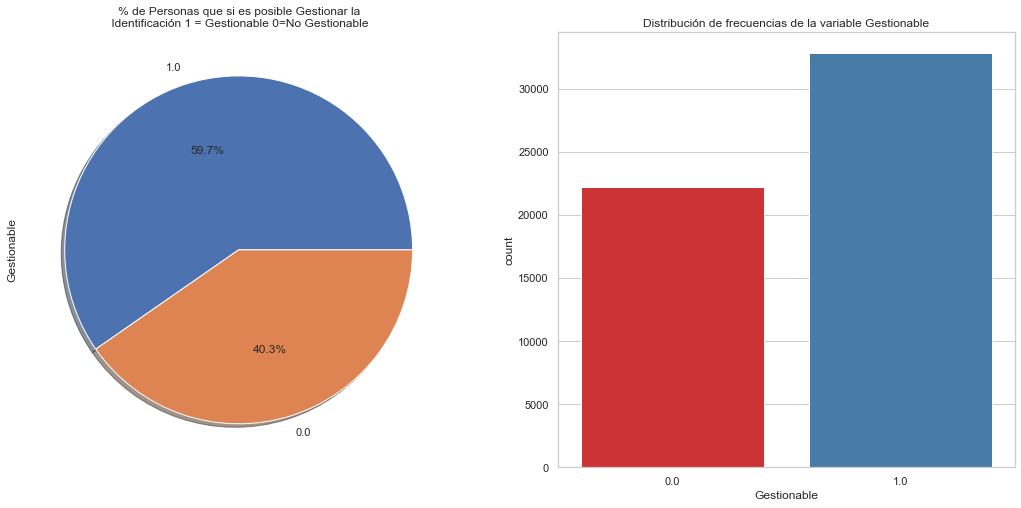

In [24]:
#Visualización de las frecuencias
f,ax=plt.subplots(1,2,figsize=(18,8))

ax[0] = data_full2['Gestionable'].value_counts().plot.pie(explode=[0,0],autopct='%1.1f%%',ax=ax[0],shadow=True)
ax[0].set_title('% de Personas que si es posible Gestionar la\n Identificación 1 = Gestionable 0=No Gestionable')


#f, ax = plt.subplots(figsize=(6, 8))
ax[1] = sns.countplot(x="Gestionable", data=data_full2, palette="Set1")
ax[1].set_title("Distribución de frecuencias de la variable Gestionable")

plt.show()

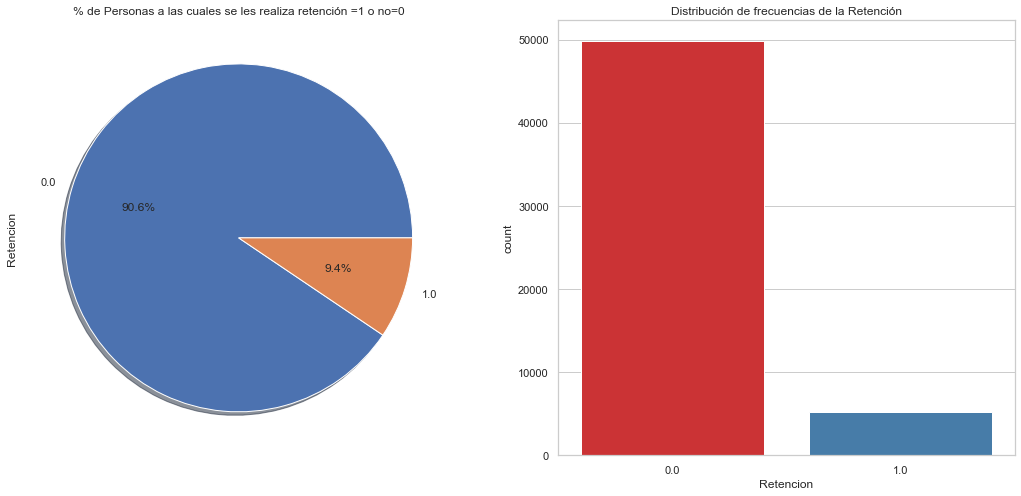

In [25]:
#Visualización de las frecuencias
f,ax=plt.subplots(1,2,figsize=(18,8))

ax[0] = data_full2['Retencion'].value_counts().plot.pie(explode=[0,0],autopct='%1.1f%%',ax=ax[0],shadow=True)
ax[0].set_title('% de Personas a las cuales se les realiza retención =1 o no=0')


#f, ax = plt.subplots(figsize=(6, 8))
ax[1] = sns.countplot(x="Retencion", data=data_full2, palette="Set1")
ax[1].set_title("Distribución de frecuencias de la Retención")

plt.show()

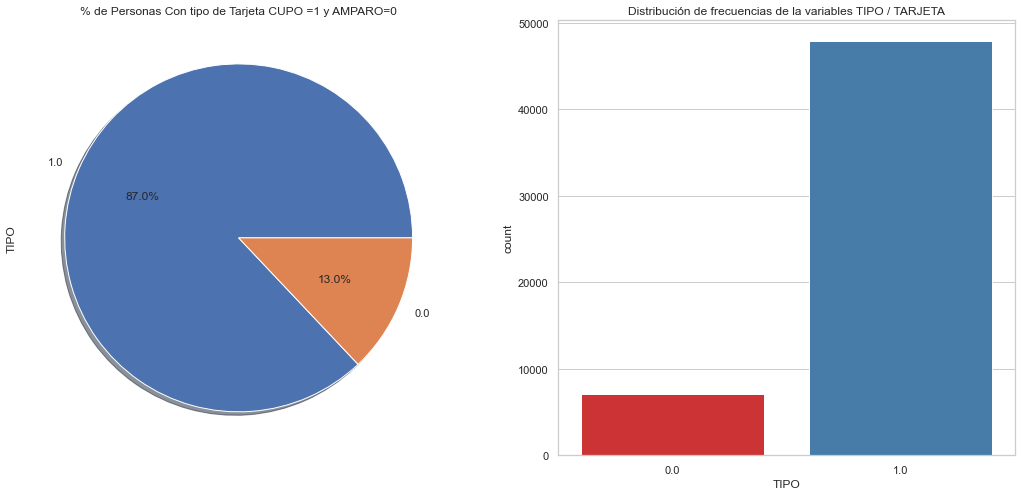

In [26]:
#Visualización de las frecuencias
f,ax=plt.subplots(1,2,figsize=(18,8))

ax[0] = data_full2['TIPO'].value_counts().plot.pie(explode=[0,0],autopct='%1.1f%%',ax=ax[0],shadow=True)
ax[0].set_title('% de Personas Con tipo de Tarjeta CUPO =1 y AMPARO=0')


#f, ax = plt.subplots(figsize=(6, 8))
ax[1] = sns.countplot(x="TIPO", data=data_full2, palette="Set1")
ax[1].set_title("Distribución de frecuencias de la variables TIPO / TARJETA")

plt.show()

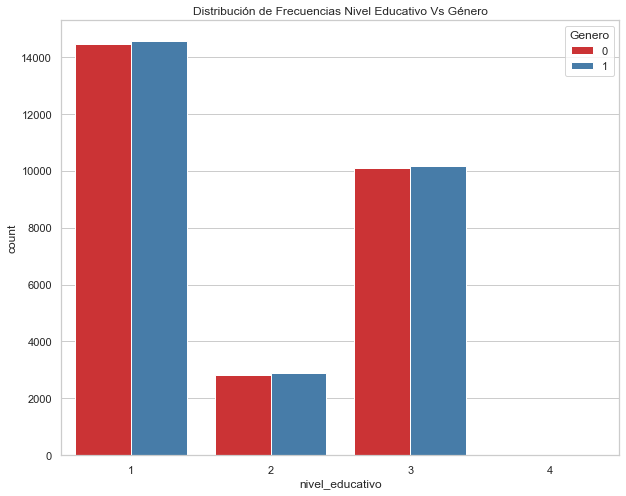

In [27]:
#Genero vs nivel educativo
f, ax = plt.subplots(figsize=(10, 8))
ax = sns.countplot(x="nivel_educativo", hue="Genero", data=data_full2, palette="Set1")
ax.set_title("Distribución de Frecuencias Nivel Educativo Vs Género")
plt.show()

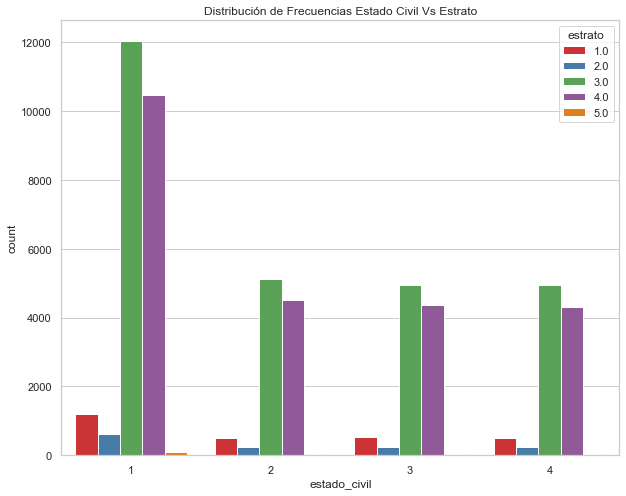

In [28]:
#Estado Civil vs Estrato
f, ax = plt.subplots(figsize=(10, 8))
ax = sns.countplot(x="estado_civil", hue="estrato", data=data_full2, palette="Set1")
ax.set_title("Distribución de Frecuencias Estado Civil Vs Estrato")
plt.show()

Text(0.5, 0, 'Cantidad de Personas a Cargo')

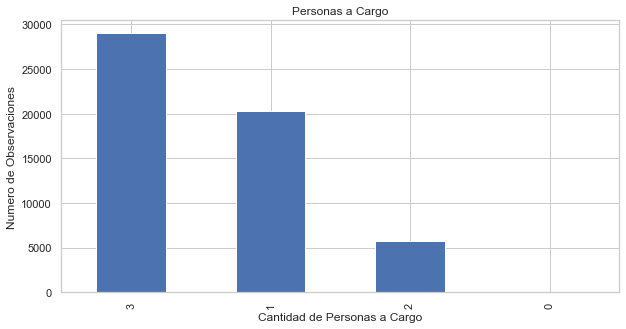

In [29]:
data_full2.PAC.value_counts().nlargest(10).plot(kind='bar', figsize=(10,5))
plt.title('Personas a Cargo')
plt.ylabel('Numero de Observaciones')
plt.xlabel('Cantidad de Personas a Cargo')

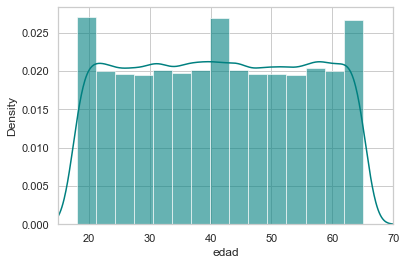

In [30]:
ax = data_full2["edad"].hist(bins=15, density=True, stacked=True, color='teal', alpha=0.6)
data_full2["edad"].plot(kind='density', color='teal')
ax.set(xlabel='edad')
plt.xlim(15,70)
plt.show()

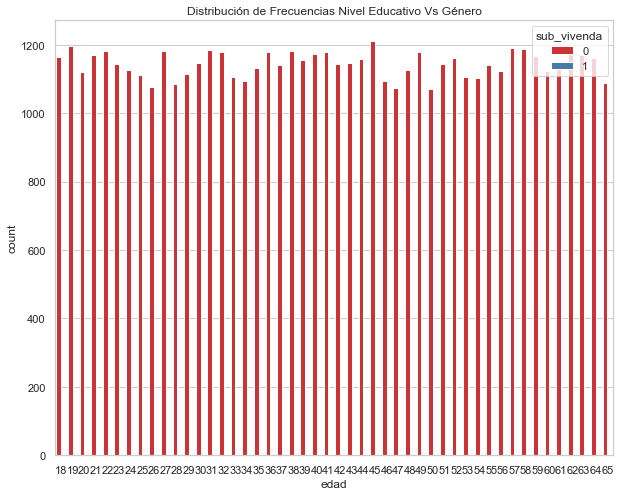

In [31]:
#Subsidio de Vivienda vs Edad
f, ax = plt.subplots(figsize=(10, 8))
ax = sns.countplot(x="edad", hue="sub_vivenda", data=data_full2, palette="Set1")
ax.set_title("Distribución de Frecuencias Nivel Educativo Vs Género")
plt.show()

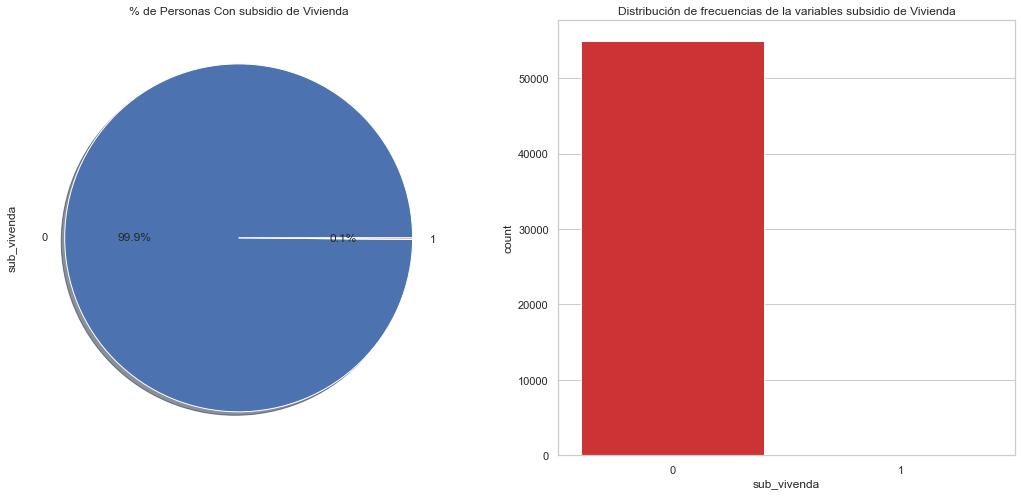

In [32]:
#Subsidio de Vivienda vs Edad
#Visualización de las frecuencias
f,ax=plt.subplots(1,2,figsize=(18,8))

ax[0] = data_full2['sub_vivenda'].value_counts().plot.pie(explode=[0,0],autopct='%1.1f%%',ax=ax[0],shadow=True)
ax[0].set_title('% de Personas Con subsidio de Vivienda')


#f, ax = plt.subplots(figsize=(6, 8))
ax[1] = sns.countplot(x="sub_vivenda", data=data_full2, palette="Set1")
ax[1].set_title("Distribución de frecuencias de la variables subsidio de Vivienda")

plt.show()

In [33]:
#Explorando variables categóricas
categorical = [var for var in data_full2.columns if data_full2[var].dtype=='O']

print('Hay {} Variables Categóricas \n'.format(len(categorical)))

print('Las Variables Categóricas son :\n\n', categorical)

Hay 16 Variables Categóricas 

Las Variables Categóricas son :

 ['Fecha.Expedicion', 'Cancelacion', 'Fecha.Proceso', 'Disponible.Avances', 'Limite.Avances', 'Total.Intereses', 'Saldos.Mes.Ant', 'Pagos.Mes.Ant', 'Vtas.Mes.Ant', 'Limite.Cupo', 'Pago.del.Mes', 'Pago.Minimo', 'Vr.Mora', 'Vr.Cuota.Manejo', 'Saldo', 'categoria']


In [34]:
numerical = [var for var in data_full2.columns if data_full2[var].dtype!='O']

print('Hay {} Variables Numéricas\n'.format(len(numerical)))

print('Las Variables Numéricas son :\n\n', numerical)

Hay 17 Variables Numéricas

Las Variables Numéricas son :

 ['id', 'Gestionable', 'Retencion', 'TIPO', 'Target', 'Edad.Mora', 'segmento', 'edad', 'nivel_educativo', 'estado_civil', 'Genero', 'PAC', 'contrato', 'estrato', 'cuota_monetaria', 'sub_vivenda', 'bono_lonchera']


### Paso 5: Correlaciones

In [35]:
X = data_full2[numerical]

y = data_full2['Target']

ids = X['id']

X = X.drop(['id','Target'], axis=1)

#columnas = X.columns


###Nivelación de desbalance de etiquetas en la variables Target
from imblearn.combine import SMOTETomek
smt = SMOTETomek(random_state=42)

X_res, y_res = smt.fit_resample(X, y)


plt.subplots(figsize=(15,10))
sns.heatmap(X_res.corr(), annot=True, cmap="RdYlGn")
plt.show()

### Paso 6: Creación del Modelo y Validación

Train/Test split results:
LogisticRegression La Acuracidad es de 0.975
LogisticRegression log_loss es 0.113
LogisticRegression Valor AUC 0.650


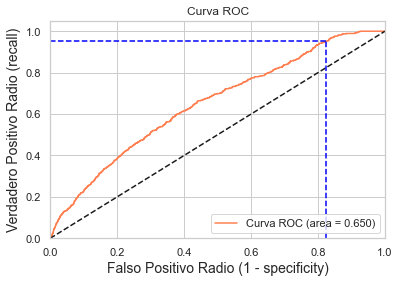

Usando threshold de 0.012 garantiza una sensibilidad de 0.951 y una especificidad de  0.177, el porcentaje de identificación de personas que dejarían el crédito con base enla variables X sugeridas es de: 82.28%.


In [37]:
##Se importan las librerías Necesarias del paquete scikit learn

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, precision_score, recall_score 
from sklearn.metrics import confusion_matrix, precision_recall_curve, roc_curve, auc, log_loss

##Se particiona el set de datos en 60% de entrenamiento y 40% de testeo, con un random state de 100
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.4, random_state=100)

# Se verifica acuracidad, sensibilidad y especificidad
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)
y_pred_proba = logreg.predict_proba(X_test)[:, 1]
[fpr, tpr, thr] = roc_curve(y_test, y_pred_proba)
print('Train/Test split results:')
print(logreg.__class__.__name__+" La Acuracidad es de %2.3f" % accuracy_score(y_test, y_pred))
print(logreg.__class__.__name__+" log_loss es %2.3f" % log_loss(y_test, y_pred_proba))
print(logreg.__class__.__name__+" Valor AUC %2.3f" % auc(fpr, tpr))

idx = np.min(np.where(tpr > 0.95)) # Indice para comprobar la sensibilidad superior a 0.95

plt.figure()
plt.plot(fpr, tpr, color='coral', label='Curva ROC (area = %0.3f)' % auc(fpr, tpr))
plt.plot([0, 1], [0, 1], 'k--')
plt.plot([0,fpr[idx]], [tpr[idx],tpr[idx]], 'k--', color='blue')
plt.plot([fpr[idx],fpr[idx]], [0,tpr[idx]], 'k--', color='blue')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Falso Positivo Radio (1 - specificity)', fontsize=14)
plt.ylabel('Verdadero Positivo Radio (recall)', fontsize=14)
plt.title('Curva ROC')
plt.legend(loc="lower right")
plt.show()

print("Usando threshold de %.3f " % thr[idx] + "garantiza una sensibilidad de %.3f " % tpr[idx] +  
      "y una especificidad de  %.3f" % (1-fpr[idx]) + 
      ", el porcentaje de identificación de personas que dejarían el crédito con base en"+ 
      "la variables X sugeridas es de: %.2f%%." % (np.array(fpr[idx])*100))


### Paso 7: Uso de Random Forest Para Determinar las mejores o no Características de la Permanencia o no Crediticia

In [38]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(random_state=100)

rfc.fit(X_train, y_train)

y_pred = rfc.predict(X_test)

from sklearn.metrics import accuracy_score

print('Eficiencia de Modelo con 10 árboles : {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Eficiencia de Modelo con 10 árboles : 0.9679


In [39]:
X_train

In [40]:
rfc_100 = RandomForestClassifier(n_estimators=100, random_state=100)

rfc_100.fit(X_train, y_train)

y_pred_100 = rfc_100.predict(X_test)

print('Eficiencia de Modelo con 100 árboles : {0:0.4f}'. format(accuracy_score(y_test, y_pred_100)))

Eficiencia de Modelo con 100 árboles : 0.9679


In [41]:
clf = RandomForestClassifier(n_estimators=100, random_state=100)
clf.fit(X_train, y_train)
feature_scores = pd.Series(clf.feature_importances_, index=X_train.columns).sort_values(ascending=False)

feature_scores

edad               0.554635
contrato           0.120616
estado_civil       0.108068
Genero             0.038970
estrato            0.035228
Gestionable        0.028881
TIPO               0.023530
Edad.Mora          0.023108
segmento           0.020314
Retencion          0.019537
cuota_monetaria    0.011251
nivel_educativo    0.006681
PAC                0.006166
bono_lonchera      0.002323
sub_vivenda        0.000693
dtype: float64

In [42]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)

print('Matriz de Confusión\n\n', cm)

Matriz de Confusión

 [[21247   166]
 [  540    11]]


<AxesSubplot:>

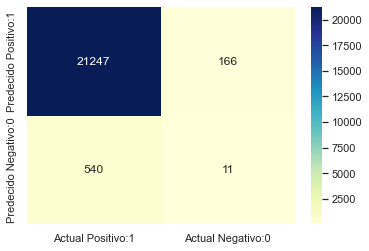

In [43]:
cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positivo:1', 'Actual Negativo:0'], 
                                 index=['Predecido Positivo:1', 'Predecido Negativo:0'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')

### 2. Modelo de Segmentación 

### 2.1 Reto Analitico 2 (Clustering)

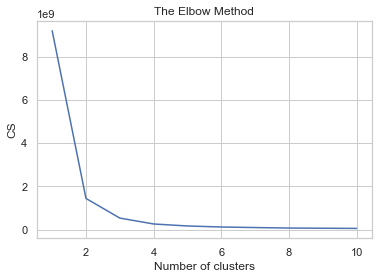

In [44]:
##Técnica del Codo para determinar el número de clusteres optimos vemos que el valor de 2, 4 y 6 son buenas decisiones
from sklearn.cluster import KMeans
cs = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(X_res)
    cs.append(kmeans.inertia_)
plt.plot(range(1, 11), cs)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('CS')
plt.show()

In [45]:
##Ejecución del algoritmo con 2 Clusteres a formar
kmeans= KMeans(n_clusters = 2, random_state = 42)

kmeans.fit(X_res)

pred = kmeans.predict(X_res)

pred

array([0, 0, 0, ..., 0, 0, 0])

In [46]:
X_res

In [47]:
#Cantidad de la data dispuesta en cada cluster
data_full2['Cluster'] = pd.DataFrame(pred, columns=['cluster'] )
print('Cantidad de datos en Cada Cluster= \n', data_full2['Cluster'].value_counts())


Cantidad de datos en Cada Cluster= 
 0    53559
1     1350
Name: Cluster, dtype: int64


In [48]:
#Métricas para evaluación matrix de confusión y reporte de clasificación
from sklearn.metrics import confusion_matrix,classification_report
print(confusion_matrix(data_full2['Cluster'],kmeans.labels_))
print(classification_report(data_full2['Cluster'],kmeans.labels_))

[[53559     0]
 [    0  1350]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     53559
           1       1.00      1.00      1.00      1350

    accuracy                           1.00     54909
   macro avg       1.00      1.00      1.00     54909
weighted avg       1.00      1.00      1.00     54909



In [ ]:
data_full2.info()

In [ ]:
kmeans= KMeans(n_clusters = 4, random_state = 42)

kmeans.fit(X)

pred = kmeans.predict(X)

pred



In [ ]:
data_full2['Cluster'] = pd.DataFrame(pred, columns=['cluster'] )
print('Cantidad de datos en Cada Cluster= \n', data_full2['Cluster'].value_counts())

In [ ]:
from sklearn.metrics import confusion_matrix,classification_report
print(confusion_matrix(data_full2['Cluster'],kmeans.labels_))
print(classification_report(data_full2['Cluster'],kmeans.labels_))

In [ ]:
##Extracción del Csv para análisis posteriores
data_full2.to_csv('ArchivoClusteres.csv')